# U2T2 - First and Second Challenges

## Overview

In this notebook we'll assess the time complexity of two algorithms regarding lookups in a Binary Search Tree. The first one returns the closest value present in the tree based on a target. The second one gets the k<sup>th</sup> largest value on a given tree. Both algorithms, the implementation of the underlying data structure as well as most of the statistical analysis and test layout were kindly given by our professor (available [here](https://github.com/ivanovitchm/datastructure/tree/main/lessons/week_09)).

## Toolkit

The code cell bellow make all the relevant imports and creates both the functions we'll be assessed (`findClosestValue` and `findKthLargestValue`) and auxiliary ones.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from scipy.stats import t
from binarysearchtree import BST

def findClosestValue(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentialy) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest

def findKthLargestValue(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)

def solver_closest(tree, target):
    return findClosestValue(tree, target)

def solver_kth_largest(tree, k):
    return findKthLargestValue(tree, k)

## Testing

The following code is responsible for running the algorithms repeatedly for various tree sizes in order to obtain a more consistent execution time measurement, fading off the hiccups related to the Operating System context switching and interruptions. In order to smooth things up yet still keep information about the variations in time observed, a confidence interval for a confidence level of 95% was established using the Student's t distribution.

### Notes:
* The `time()` function in the time module was substituted for the more precise `perf_counter()` version available in order to capture best the execution time of the Closest Value Algorithm;
* The number of execution for each step were cranked up to 20 to help reduce the CI;
* The range from which the data for the tree was altered from originally 1000 to 2 times the size of the current iteration to avoid too much repeated values in larger trees;
* 123 and 5 were chosen as test parameters for the algorithms for no particular reason.

In [99]:
# Setup
np.random.seed(42)
N = 10 ** 6  # Maximum vector size
steps = 10  # Number of steps to test
executions_per_size = 20  # Number of executions per vector size

vector_sizes = np.linspace(100, N, steps, dtype=int)

# Data structures to store results
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Run tests
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    for _ in range(executions_per_size):
        # Generate random data for integers in the range [0, 2*size)
        data = np.random.randint(0, 2*size, size)

        # Create a binary search tree with the data
        tree = BST()
        for value in data:
            tree.add(value)
        
        # Track time for solver_closest
        start = perf_counter()
        solver_closest(tree, target=123)
        times_closest.append(perf_counter() - start)

        # Track time for solver_kth_largest
        start = perf_counter()
        solver_kth_largest(tree, k=5)
        times_kth_largest.append(perf_counter() - start)

    # Calculate mean and confidence interval (confidence level = 95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

## Results

The following plot show the mean execution time for both algorithms tested. The second one looks individually at the Closest Value Algorithm's performance in order to better visualize it without the behavior being overshadowed by the scale of the algorithm for the Kth Largest Value.

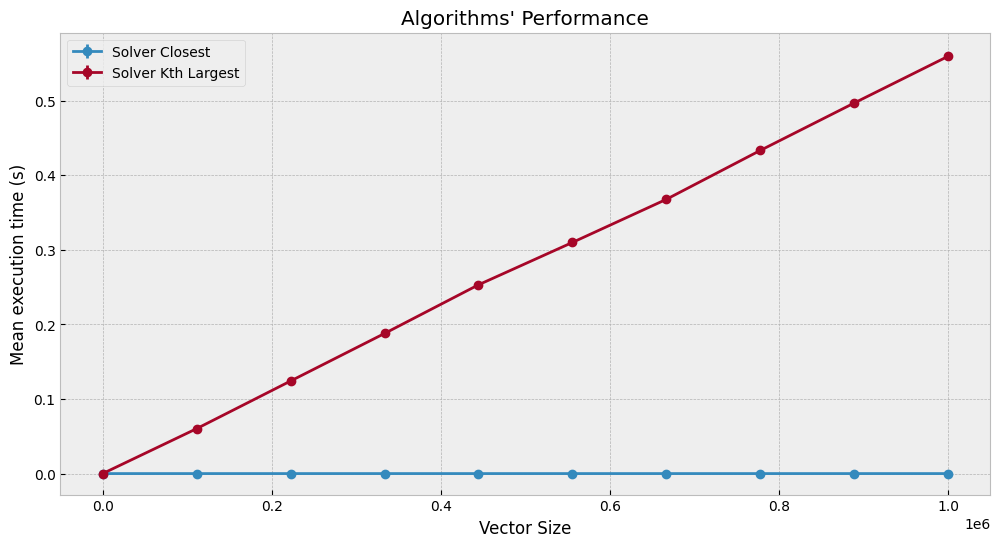

In [105]:
# Plot the results
plt.style.use('bmh')
plt.figure(num=0, figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Vector Size')
plt.ylabel('Mean execution time (s)')
plt.title("Algorithms' Performance")
plt.legend()
plt.grid(True)
plt.show()

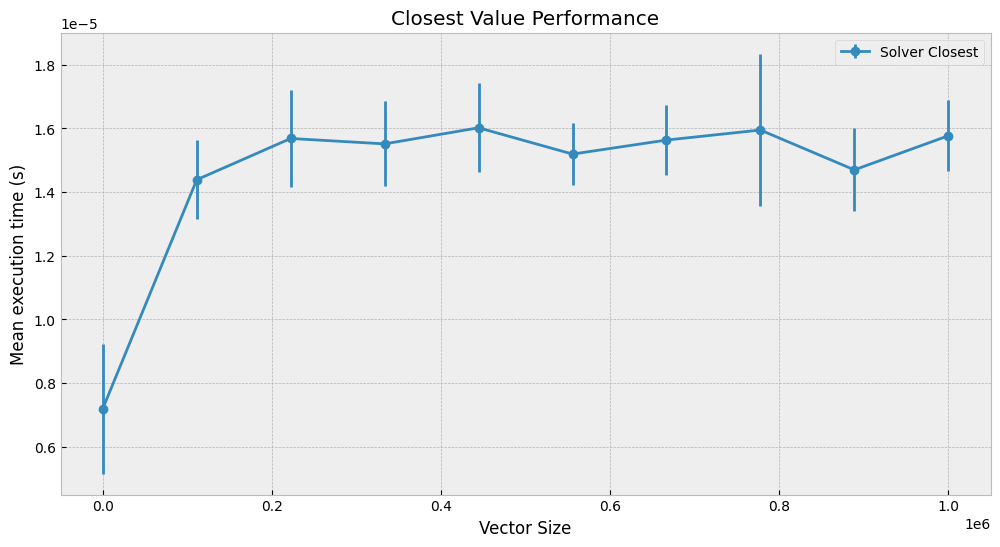

In [114]:
plt.style.use('bmh')
plt.figure(num=1, figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.xlabel('Vector Size')
plt.ylabel('Mean execution time (s)')
plt.title("Closest Value Performance")
plt.legend()
plt.grid(True)
plt.show()